In [1]:
import cv2
import numpy as np
import sys
import os 
from pdf2image import convert_from_path
import easyocr
import csv
import matplotlib.pyplot as plt

In [11]:
images = convert_from_path('./-Layout1.pdf', dpi =210, poppler_path="..\\..\\poppler-24.02.0\\Library\\bin")
cv_img = cv2.cvtColor(np.asarray(images[0]), cv2.COLOR_RGB2BGR)
img_gray = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)
_, img_th = cv2.threshold (img_gray, 240, 255, 0)

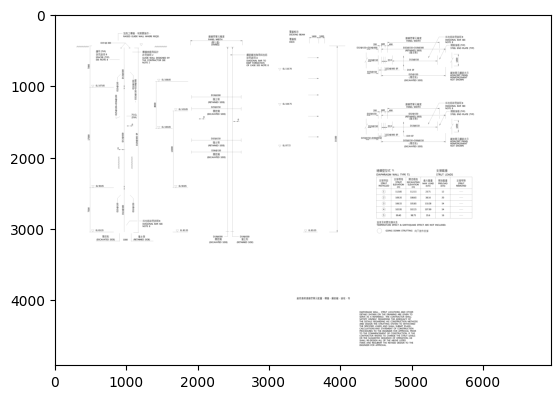

In [3]:
plt.imshow(img_th, cmap='gray')

In [12]:
reader = easyocr.Reader(['en'])
# bounds = reader.readtext(img_th, detail=1)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [7]:
import re
for i in range(len(images)):
    cv_img = cv2.cvtColor(np.asarray(images[i]), cv2.COLOR_RGB2BGR)
    img_gray = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)
    _, img_th = cv2.threshold (img_gray, 240, 255, 0)
    
    bounds = reader.readtext(img_th, detail=1)
    for bound in bounds:
        # 使用正則表示式來抓取數字
        pattern = r'(\d+)\s*CL'
        match = re.search(pattern, bound[1])
        if match:
            print(f'{i+1}頁: {match.group(1)}mm')
            break



2頁: 75mm


In [13]:
bounds_img1 = reader.readtext(img_th, detail=1)

In [14]:
for index in bounds_img1:
  print(index[1])

23m2
116z9i2
785*em/
DECKING BEAM
RAISED GUIDE WALL WHERE REQD.
#'A88T86
1600
1000
Nmm FBraa
PANEL_WIDTH
23#
4a88726
DIAGONAL BAR SEE
DECK
PANEL WIDTH
NOTE
D19 @ 300
XB
200
600
400
#EitR (TYP)
FIRIRIRIAMIAIAIA
IIAIAINIAINIAIA
D32@150+019@300
D32@150+D19@300
STEEL END PLATE (TYP)
#E (TYP)
siarmex3t
(RETANERUSIDE)
##Earb
AEarh]
#8Ae1b0ze Ajytn Af
SPACER (TYP)
GUIDE WALL DESIGNED BY
ZFE
SEE NOTE
THE CONTRACTOR SEE
DIAGONAL BAR TO
913@150  
D13
D13@150
NOTE
KEEP FORMATION
OF CAGE SEE NOTE
EL 110.70
D22@300 EF
D19 EF
8
D25@150
D25@150
AIAWE
INAANE
Fitz/el)
REINFORCEMENT
EL 108.85
(EXCAVATED SIDE)
NOT SHOWN
107.85
3
88
7
D19@300
#E/U
(RETAINED SIDE)
NjM#Earai8
1
D25@150
EL 104.75
PNWD
DIAGONAL BAR SEE
NOTE
EL 103.85
19tz /u
200
600
400
dem# (TYP)
75
(EXCAVATED SIDE)
D32@150
D32@150
STEEL END PLATE (TYP)
(TYP)
RRETANERUSIDE)
EL 100.85
D13@1504
D13
D13@150
#|
D220300 EF
D19 EF
2

D32@150
8
025@150+036@15Q
D25@150+D36@150
##eEETG16Z
8
t+
FtznU)
REICRCEMENEL
(RETAINED SIDE)
EL 97.72
(EXCAVATED S

In [10]:
for bound in bounds:
            pattern2 = r'\b(\d+)\s*E\b'
            match2 = re.search(pattern2, bound[1])
            if match2:
                print(f'{i+1}頁: {match2.group(1)}mm')
                print(bound[1])
                protection_check = 2
                break


3頁: 75mm
75 E
